In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')  # Adjust the filename if needed

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [8]:
# Check missing values
print(df.isnull().sum())

# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' if too many missing values
df.drop('Cabin', axis=1, inplace=True,errors='ignore')

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-8-547e3c38f876>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-8-547e3c38f876>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [16]:
# One-hot encode 'Sex' and 'Embarked'
# The previous print statement showed these columns are already encoded.
# Remove the get_dummies call here as it's redundant and causes the error.
# df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True) # This line is removed

from sklearn.preprocessing import StandardScaler
from IPython.display import display # Import display

scaler = StandardScaler()
# Ensure the columns 'Age' and 'Fare' still exist for scaling
if 'Age' in df.columns and 'Fare' in df.columns:
    df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
    # Add a line to display the DataFrame head after scaling
    print("DataFrame after scaling Age and Fare:")
    display(df.head())
else:
    print("Warning: 'Age' or 'Fare' column not found. Skipping scaling.")

DataFrame after scaling Age and Fare:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,True,False,True


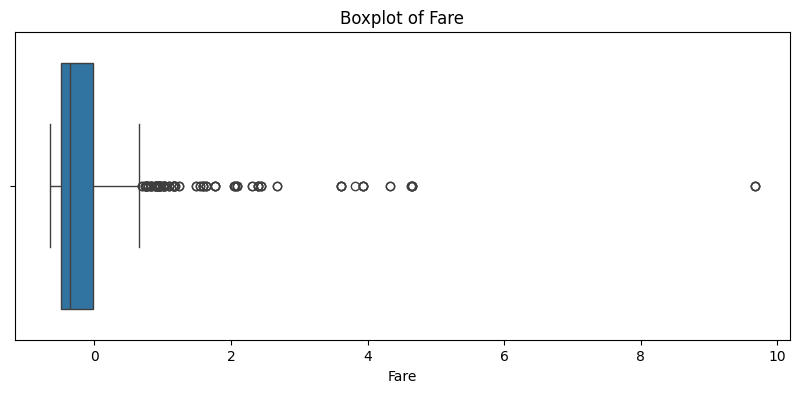

In [17]:
# Visualize outliers
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

# Remove outliers in 'Fare' using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
